# Support Vector Machines

1. Resources:
    - [Andrew Ng's Coursera](https://www.youtube.com/watch?v=r3uBEDCqIN0&index=71&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)
    - [MIT AI Course](https://www.youtube.com/watch?v=_PwhiWxHK8o&t=1094s)
    - [NumPy Tutorial on SVM](http://scikit-learn.org/stable/modules/svm.html)
    

### Support Vector Machines

- a powerful way to learn non-linear function
- If you have a small number of training examples, and large numbers of features, it is better to use logistic regression than use SVM
- SVM could not only perform linear classification, but also non-linear classification with kernel.
- SVMs are a set of **supervised learning** methods that used for classification, regression, and outliers detections


1. Advantage in using SVMs:
    - effective in high dimensional spaces
    - works better if number of samples are larger than number of features / dimensions
    - uses a subset of training points / landmarks in the decision function (called support vector), so it is also memory efficient.
    - versatile: different kernel function can be specified for the decision function.
    
2. Disadvantage of using SVMs:
    - If the dimension / features are much greater than training examples, this could cause overfitting / high variance. You could instead use logistic regression, or SVMs with linear kernels, or use some regularizations
    - SVMs do not directly provide probability estimates, these are calculated using an expensive 5-fold cross validation.
    

### Importing some libraries
* seaborn is a statistical data visualization library
* pylab: is part of the matplotlib (in matplotlib.pylab) and tries to give you a MatLab like environment. matplotlib has a number of dependencies, among them are numpy, which it imports unders the common alias np, scipy is not a dependancy of matplotlib.
* %matplotlib is a magic function in IPython. 


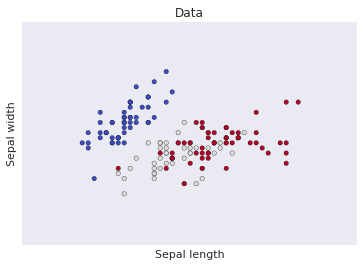

In [31]:
import matplotlib
#matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
 
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Data')
plt.show()

/u/a/i/aiden/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/u/a/i/aiden/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


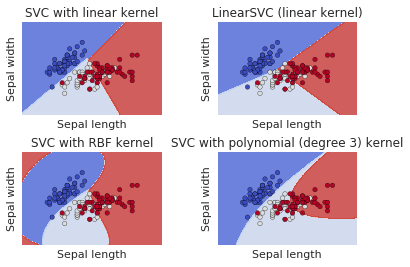

In [33]:

 
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
 
h = .02  # step size in the mesh
 
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()